<a href="https://colab.research.google.com/github/1522alisha/Machine-Learning-Lab/blob/main/Random_Forest_%26_KNK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer_churn_dataset-testing-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [ ]:
print("Dataset row & col:", df.shape)

Dataset row & col: (64374, 12)


In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
# drop customerID
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
# Convert 'Churn' to int
from sklearn.preprocessing import LabelEncoder
df['Churn'] = df['Churn'].astype(int)

# Encode categorical columns
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Train Random Forest (with class_weight)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [ ]:
#Evaluation with Full Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)


In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)


In [ ]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

In [ ]:
# Print results
print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):        {precision:.5f}")
print(f"Recall (Sensitivity):   {recall:.5f}")
print(f"F1 Score:               {f1:.5f}")
print(f"ROC AUC:                {roc_auc:.5f}")
print(f"Specificity (TNR):      {specificity:.5f}")
print(f"False Positive Rate:    {fpr:.5f}")
print(f"False Negative Rate:    {fnr:.5f}")
print(f"Balanced Accuracy:      {balanced_acc:.5f}")
print(f"Matthews Corr Coef:     {mcc:.5f}")


Accuracy:              0.99814
Precision (PPV):        0.99869
Recall (Sensitivity):   0.99738
F1 Score:               0.99803
ROC AUC:                0.99999
Specificity (TNR):      0.99882
False Positive Rate:    0.00118
False Negative Rate:    0.00262
Balanced Accuracy:      0.99810
Matthews Corr Coef:     0.99626


In [ ]:

#Confusion Matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
# Title
title = "Confusion Matrix - Random Forest"

In [ ]:
# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

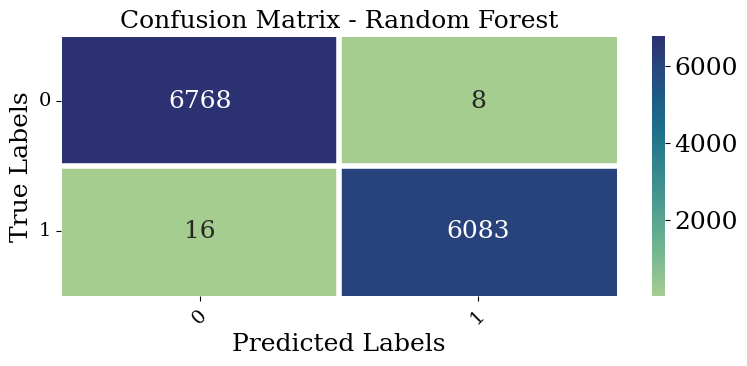

In [ ]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

# **KNN Classification**

In [ ]:

le_new = LabelEncoder()

In [ ]:
df_ohe = df.copy()
df_ohe

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14,1
64370,37,1,6,1,5,22,2,0,923,9,1
64371,25,1,39,14,8,30,1,1,327,20,1
64372,50,0,18,19,7,22,2,1,540,13,1


In [ ]:
# Dataset split into X and y
X = df_ohe.drop('Churn',axis=1)
y = df_ohe['Churn']

In [ ]:
columns = ['Gender', 'Subscription Type', 'Contract Length']
for col in columns:
  X[col] = le_new.fit_transform(X[col])
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18
...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14
64370,37,1,6,1,5,22,2,0,923,9
64371,25,1,39,14,8,30,1,1,327,20
64372,50,0,18,19,7,22,2,1,540,13


In [ ]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [ ]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
ct = ColumnTransformer([('Gender', OneHotEncoder(), [1])], remainder='passthrough')

In [ ]:
X = ct.fit_transform(X)
X

array([[  1.,   0.,  22., ...,   1., 598.,   9.],
       [  1.,   0.,  41., ...,   1., 584.,  20.],
       [  0.,   1.,  47., ...,   0., 757.,  21.],
       ...,
       [  0.,   1.,  25., ...,   1., 327.,  20.],
       [  1.,   0.,  50., ...,   1., 540.,  13.],
       [  1.,   0.,  52., ...,   1., 696.,  22.]])

In [ ]:
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51499, 11)
(12875, 11)
(51499,)
(12875,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=593)


In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=593)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

In [ ]:
print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):        {precision:.5f}")
print(f"Recall (Sensitivity):   {recall:.5f}")
print(f"F1 Score:               {f1:.5f}")
print(f"ROC AUC:                {roc_auc:.5f}")
print(f"Balanced Accuracy:      {balanced_acc:.5f}")
print(f"Matthews Corr Coef:     {mcc:.5f}")


Accuracy:              0.79371
Precision (PPV):        0.76591
Recall (Sensitivity):   0.81125
F1 Score:               0.78793
ROC AUC:                0.79463
Balanced Accuracy:      0.79463
Matthews Corr Coef:     0.58835
